# MTN Data Science Academy - Practical

Welcome to the final practical session of the MTN Data Science Academy. In this practical session, you will work by yourself, with minimal assistance from the instructors, to complete the tasks asked of you. You are free to collaborate with your colleagues and use the internet. 

The dataset is that of loan applications. The data contains some information about loan applicants and whether they received a loan or not. We will be using Python to investigate this data, and ensure it is neat and clean to carry out a machine learning experiment. You will be given an instruction and asked to complete the code for it. The expected output of what you should see after running your code is given at the end of each cell. You can find out how to do pretty much everything asked of you with a quick Google search. 

Good luck!

Import all of the packages we will be using in the lab.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Import the data

In [4]:

df = pd.read_csv('loan_data_set.csv') # If you are using Jupyter Notebooks on your PC, uncomment this line.


# #If you are using the Azure Machine Learning Studio, uncomment this block.
# from azureml import Workspace

# ws = Workspace()
# ds = ws.datasets['loan_data_set.csv']
# df = ds.to_dataframe()



In [4]:
# Write code to display yhe first 10 lines of the dataframe.


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001029   Male      No          0      Graduate            No   
2  LP001038   Male     Yes          0  Not Graduate            No   
3  LP001448    NaN     Yes         3+      Graduate            No   
4  LP001097   Male      No          1      Graduate           Yes   
5  LP001100   Male      No         3+      Graduate            No   
6  LP001197   Male     Yes          0      Graduate            No   
7  LP001207   Male     Yes          0  Not Graduate           Yes   
8  LP001213   Male     Yes          1      Graduate            No   
9  LP001370   Male      No          0  Not Graduate           NaN   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             1853             2840.0       114.0             360.0   
2             4887                0.0       133.0             360.0   
3            23803                0.0       370.0             360.0   
4             4692                0.0       106.0             360.0   
5            12500             3000.0       320.0             360.0   
6             3366             2200.0       135.0             360.0   
7             2609             3449.0       165.0             180.0   
8             4945                0.0         NaN             360.0   
9             7333                0.0       120.0             360.0   

   Credit_History Property_Area Loan_Status Application_Date Title  \
0             1.0         Rutal           N       2017/05/11    Mr   
1             1.0         Rutal           N       2014/07/17    Mr   
2             1.0         Rutal           N       2015/11/07    Mr   
3             1.0         Rutal           Y       2017|06|14    Dr   
4             1.0         Rutal           N       2017|06|01    Mr   
5             1.0         Rutal           N       2015/08/31    Mr   
6             1.0         Rutal           N       2017/05/14    Mr   
7             0.0         Rutal           N       2016.10.21    Mr   
8             0.0         Rutal           N       2018|04|28    Mr   
9             1.0         Rutal           N       2014/10/01    Mr   

           City  
0     Centurion  
1  Johannesburg  
2    Waterkloof  
3       Midrand  
4       Midrand  
5    Waterkloof  
6       Midrand  
7    Waterkloof  
8      Pretoria  
9      Edenvale

Let's investigate the columns in the dataset.

In [5]:
# Write code to display the columns of the dataset.


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Application_Date', 'Title', 'City'],
      dtype='object')

The column **Loan_Status** is the indicator as to whether the person received a loan or not. In the following cell, we want to investigate if there are any indicators in the numerical data that would indicate whether a person is more likely to receive a loan or not.

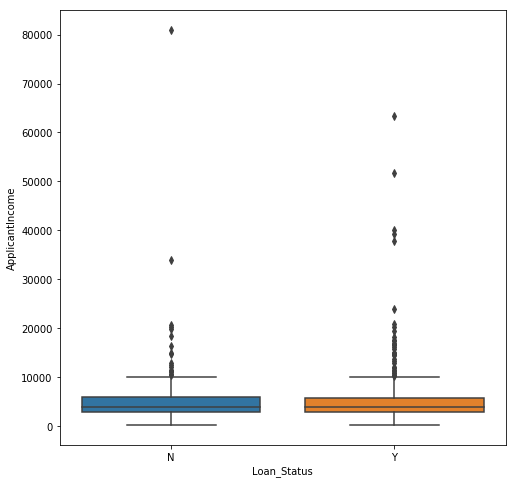

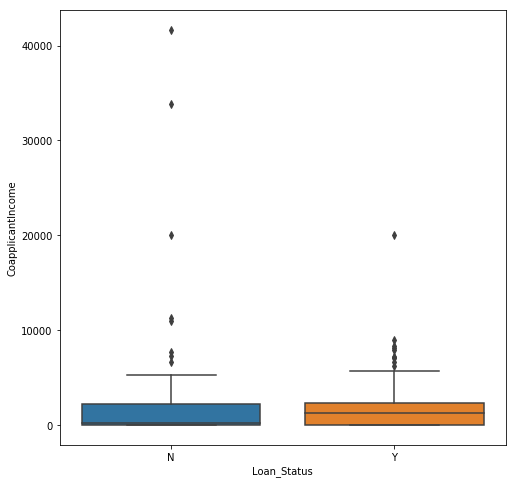

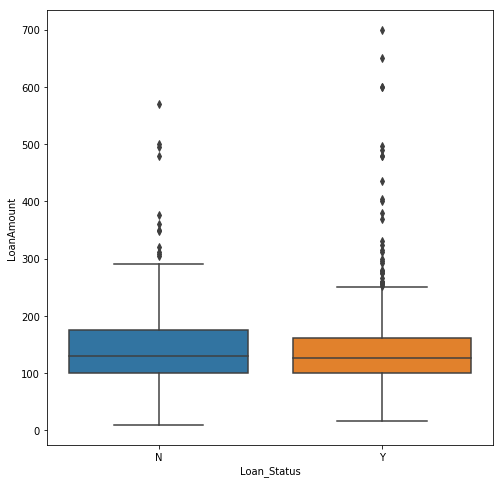

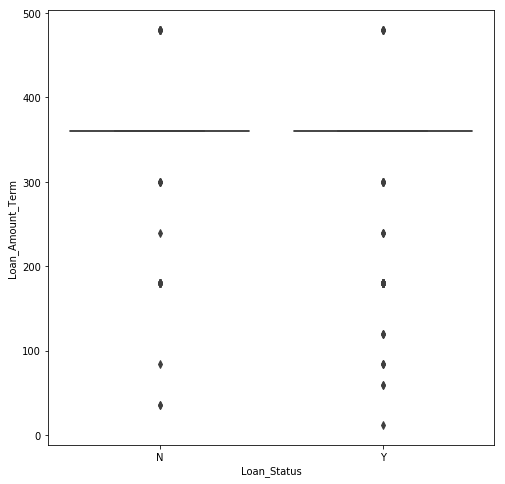

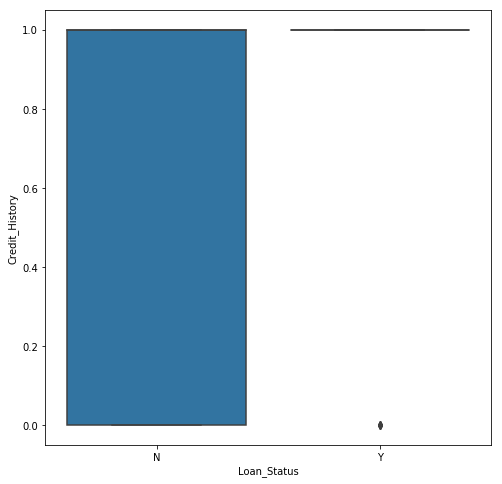

In [6]:
for column in df.columns:

    if df[column].dtypes in ['int64', 'float64']:
        plt.figure(figsize = (8,8))
        sns.boxplot(x = 'Loan_Status', y = column, data = df, notch = False)

There does not seem to be any strong indications in the numerical data to suggest a person will receive a loan. Let us investigate the categorical type data to determine if there are any factors that influence a person's ability to receive a loan.

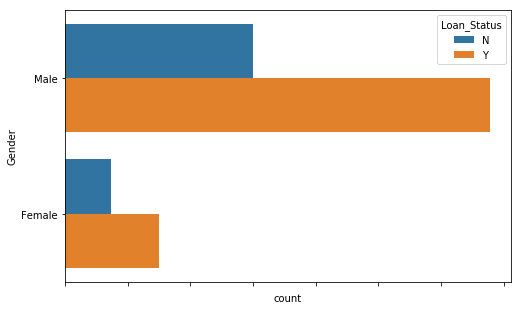

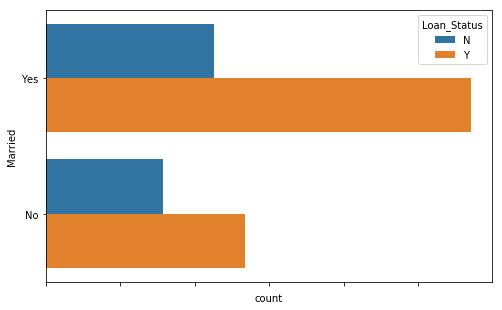

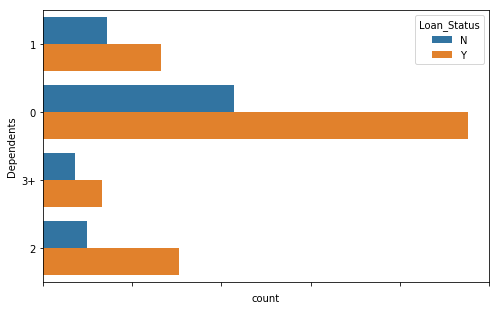

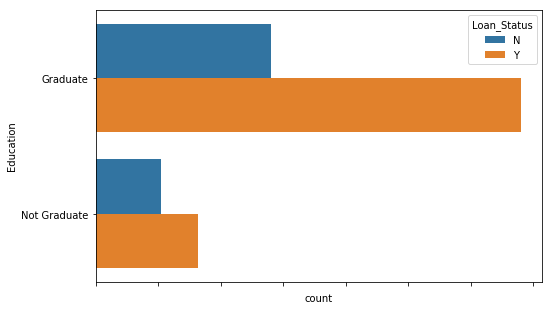

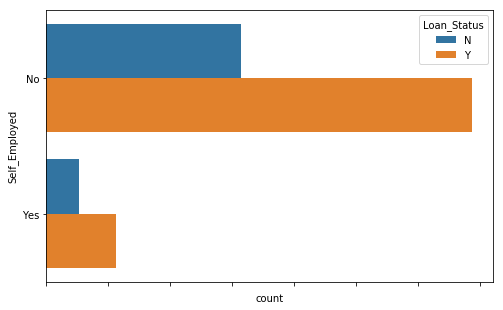

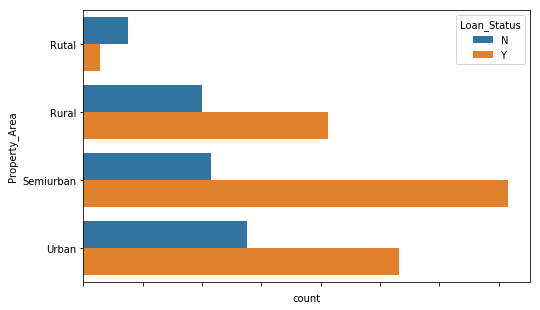

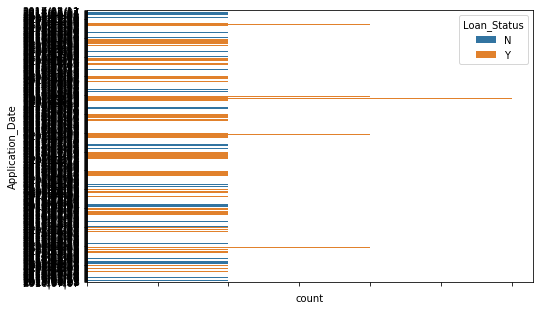

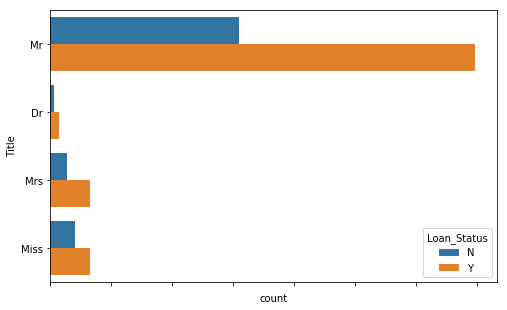

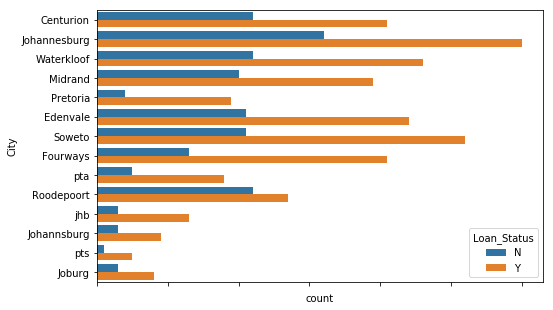

In [7]:
for column in df.columns:
    if column not in ['Loan_ID', 'Loan_Status']:
        if df[column].dtypes not in ['int64', 'float64']:
            plt.figure(figsize = (8,5))
            chart = sns.countplot(y = column, data = df, hue='Loan_Status' )
            chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)


There are some factors which seem to correlate with whether a person may receive a loan. Particularly the following columns:

1. **Married** = Yes
2. **Dependants** = 0
3. **Education** = Graduate
4. **Self_Employed** = No
5. **Property_Area** = Semiurban

Further, we can see that there are some errors in the data. Names of cities and property areas are misspelled. We will address these errors shortly.

Let us first investigate teh data types of the columns.

In [8]:
# Write code to display the datatypes of the columns in the dataframe.


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Application_Date      object
Title                 object
City                  object
dtype: object

We would expect to see the **Application_Date** column to be of a *Date* type. Let us have a look at this column.

In [9]:
# Write code to display the Application_Date column from the dataframe


0      2017/05/11
1      2014/07/17
2      2015/11/07
3      2017|06|14
4      2017|06|01
          ...    
609    2015/03/25
610    2015/04/27
611    2017.08.08
612    2015/10/23
613    2016|07|07
Name: Application_Date, Length: 614, dtype: object

We can see that there are some errors in how the dates were captured. Some dates have the Years, Months and Days separated by '.', or '/', or '|'. We need to replace these erroneous separators.

In [11]:
def replace_sep(date):
    date = str(date)
    date = date.replace('.', '/')
    date = date.replace(',', '/')
    date = date.replace('|', '/')
    return date

In [12]:
# Using the .apply() method, apply the replace_sep function to the Application _Date column.


Change the data type to *Date*

In [13]:
df['Application_Date'] = pd.to_datetime(df['Application_Date'])

Check the data types again.

In [14]:
# Write code to display the data types of the columns again.


Loan_ID                      object
Gender                       object
Married                      object
Dependents                   object
Education                    object
Self_Employed                object
ApplicantIncome               int64
CoapplicantIncome           float64
LoanAmount                  float64
Loan_Amount_Term            float64
Credit_History              float64
Property_Area                object
Loan_Status                  object
Application_Date     datetime64[ns]
Title                        object
City                         object
dtype: object

We can see that the data type for the **Application_Date** column is now correct. 

Now we will do the sort out the misspelled items in the **Property_Area** column. First let us get a unique list of values.

In [15]:
# Get a unique list of values from the Property_Area column


{'Rural', 'Rutal', 'Semiurban', 'Urban'}

In [16]:
# Using a for-loop, set the value of the Property_Area column = 'Rural' if the value of the Property_Area column = 'Rutal'


C:\Users\julesd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


{'Rural', 'Semiurban', 'Urban'}

Let us sort out the misspelled city names. 
First, let us get a unique list of city names.

In [17]:
cities = set(df['City'])
cities

{'Centurion',
 'Edenvale',
 'Fourways',
 'Joburg',
 'Johannesburg',
 'Johannsburg',
 'Midrand',
 'Pretoria',
 'Roodepoort',
 'Soweto',
 'Waterkloof',
 'jhb',
 'pta',
 'pts'}

Here, we create a dictionary, d, which contains a mapping of the incorrect spelling of the city names to the correct spelling of the city names.

In [18]:
d = {
 'Joburg':'Johannesburg',
 'Johannesburg':'Johannesburg',
 'Johannsburg':'Johannesburg',
 'jhb':'Johannesburg',
 'pta':'Pretoria',
 'pts':'Pretoria'}

We create a nested for-loop to:
1. Iterate through each row in the City column.
2. For each row in the City column, we iterate through the dictionary.
3. If the spelling of the value in the currently iterated City column equals the currently iterated key in the dictionary, we replace the value of the City column with the value of the dictionary.

In [19]:
# Write code to implement the above instrcution.
## Your code here




## 

set(df['City'])

C:\Users\julesd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


{'Centurion',
 'Edenvale',
 'Fourways',
 'Johannesburg',
 'Midrand',
 'Pretoria',
 'Roodepoort',
 'Soweto',
 'Waterkloof'}

Our data is now clean. We can continue to a machine learning task.

# Machine Learning

We want to see if we can predict if a person was given or denied a loan.

First, let us have a look at the data types of the columns.

In [20]:
df.drop(['City', 'Application_Date', 'Title'], axis = 1, inplace = True)

In [21]:
for column in df.columns:
    if (column not in ['Loan_ID', 'Loan_Status']) and df[column].dtypes not in ['int64', 'float64']:
        df[column] = pd.Series(df[column], dtype = 'category')
        

Import the machine learning packages needed.

In [22]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.cross_validation import train_test_split as tts
from sklearn import metrics

C:\Users\julesd\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Set the **Loan_ID** column to be the dataframe index.

In [23]:
df.index = df['Loan_ID']
df.drop('Loan_ID', axis = 1, inplace = True), 

(None,)

Create a copy of the dataframe. We will use this copy later.

In [24]:
df_original = df.copy()

This cell changes the text data type columns to numeric columns. In order for the machine learning algoorithm to work, we need all of the columns to be numeric.

In [25]:
for column in df.columns:
    if df[column].dtypes not in ['int64', 'float64'] and column not in ['Loan_ID', 'Application_Date']:
        temp_df = pd.get_dummies(df[column],drop_first=True, prefix=column)
        df = pd.concat([df, temp_df], axis = 1)
        df.drop(labels=column, axis = 1, inplace=True)
        
df

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001003             4583             1508.0       128.0             360.0   
LP001029             1853             2840.0       114.0             360.0   
LP001038             4887                0.0       133.0             360.0   
LP001448            23803                0.0       370.0             360.0   
LP001097             4692                0.0       106.0             360.0   
...                   ...                ...         ...               ...   
LP002114             4160                0.0        71.0             360.0   
LP002953             5703                0.0       128.0             360.0   
LP002960             2400             3800.0         NaN             180.0   
LP002983             8072              240.0       253.0             360.0   
LP002984             7583                0.0       187.0             360.0   

          Credit_History  Gender_Male  Married_Yes  Dependents_1  \
Loan_ID                                                            
LP001003             1.0            1            1             1   
LP001029             1.0            1            0             0   
LP001038             1.0            1            1             0   
LP001448             1.0            0            1             0   
LP001097             1.0            1            0             1   
...                  ...          ...          ...           ...   
LP002114             1.0            0            0             0   
LP002953             1.0            1            1             0   
LP002960             1.0            1            1             0   
LP002983             1.0            1            1             1   
LP002984             1.0            1            1             0   

          Dependents_2  Dependents_3+  Education_Not Graduate  \
Loan_ID                                                         
LP001003             0              0                       0   
LP001029             0              0                       0   
LP001038             0              0                       1   
LP001448             0              1                       0   
LP001097             0              0                       0   
...                ...            ...                     ...   
LP002114             0              0                       0   
LP002953             0              1                       0   
LP002960             0              0                       1   
LP002983             0              0                       0   
LP002984             1              0                       0   

          Self_Employed_Yes  Property_Area_Semiurban  Property_Area_Urban  \
Loan_ID                                                                     
LP001003                  0                        0                    0   
LP001029                  0                        0                    0   
LP001038                  0                        0                    0   
LP001448                  0                        0                    0   
LP001097                  1                        0                    0   
...                     ...                      ...                  ...   
LP002114                  0                        1                    0   
LP002953                  0                        0                    1   
LP002960                  0                        0                    1   
LP002983                  0                        0                    1   
LP002984                  0                        0                    1   

          Loan_Status_Y  
Loan_ID                  
LP001003              0  
LP001029              0  
LP001038              0  
LP001448              1  
LP001097              0  
...                 ...  
LP002114              1  
LP002953              1  
LP

This next cell shows a plot of the data to highlight all missing values.

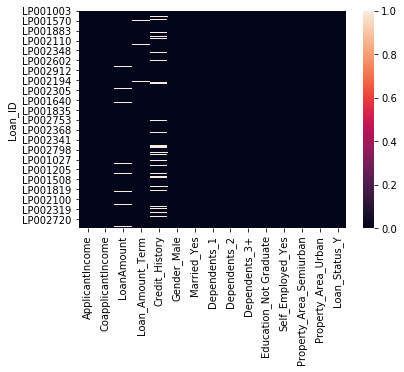

In [26]:
sns.heatmap(df.isnull())

This cell gets rid of missing values.

In [27]:
print(df.shape)
df.dropna(inplace = True)
print(df.shape)

(614, 15)
(529, 15)


We need to break up the dataset into the data and the labels. *x* will be the dataset, and *y* will be the labels. 

In [28]:
x = df.drop('Loan_Status_Y', axis = 1)
y = df['Loan_Status_Y']

In oder to perform machine learning, we need to split the data up into a training set and a testing set. This package will carry this out.

In [29]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.3, random_state = 0)

Here we are assigning the Logistic Regression function to the variable *model*

In [30]:
model = lr()

This function actually trains the machine learning model on the dataset.

In [31]:
model.fit(X = x_train, y = y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Here, we are taking the testing set and predicting the values for it.

In [32]:
pred = model.predict(x_test)

This cell provides some metrics as to the performance of the machine learning algorithm.

In [33]:
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
accuracy = metrics.accuracy_score(y_test, pred)
matrix = metrics.confusion_matrix(y_test, pred)

print(matrix)
print('Accuracy: ',  accuracy)
print('Recall: ', recall)
print('Precision: ', precision)

[[ 20  30]
 [  3 106]]
Accuracy:  0.7924528301886793
Recall:  0.9724770642201835
Precision:  0.7794117647058824


This cell combines the predictions with the dataset.

In [34]:
df_pred = pd.DataFrame()
df_pred = x_test
df_pred['Prediction'] = pred

df_pred = df_pred[['Prediction']]

def one_to_true(data):
    if data == '1':
        return 'Y'
    if data == '0':
        return 'N'

df_pred['Prediction'] = df_pred['Prediction'].astype(str)
df_pred['Prediction'] = df_pred['Prediction'].apply(one_to_true)
df_pred



C:\Users\julesd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\julesd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\julesd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to

Prediction
Loan_ID            
LP002087          Y
LP001715          Y
LP001451          N
LP002140          Y
LP002768          Y
...             ...
LP001050          N
LP002368          Y
LP001814          Y
LP002097          Y
LP002948          Y

[159 rows x 1 columns]

This cell combines the predictions with the original dataset, such that we can see how our predictions compare to the actual values.

In [35]:
df_pred = pd.concat([df_original, df_pred], axis = 1)
df_pred.dropna(inplace = True)

C:\Users\julesd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [36]:
df_pred

Gender Married Dependents     Education Self_Employed  \
LP001006    Male     Yes          0  Not Graduate            No   
LP001008    Male      No          0      Graduate            No   
LP001014    Male     Yes         3+      Graduate            No   
LP001018    Male     Yes          2      Graduate            No   
LP001029    Male      No          0      Graduate            No   
...          ...     ...        ...           ...           ...   
LP002959  Female     Yes          1      Graduate            No   
LP002978  Female      No          0      Graduate            No   
LP002979    Male     Yes         3+      Graduate            No   
LP002983    Male     Yes          1      Graduate            No   
LP002984    Male     Yes          2      Graduate            No   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
LP001006             2583             2358.0       120.0             360.0   
LP001008             6000                0.0       141.0             360.0   
LP001014             3036             2504.0       158.0             360.0   
LP001018             4006             1526.0       168.0             360.0   
LP001029             1853             2840.0       114.0             360.0   
...                   ...                ...         ...               ...   
LP002959            12000                0.0       496.0             360.0   
LP002978             2900                0.0        71.0             360.0   
LP002979             4106                0.0        40.0             180.0   
LP002983             8072              240.0       253.0             360.0   
LP002984             7583                0.0       187.0             360.0   

          Credit_History Property_Area Loan_Status Prediction  
LP001006             1.0         Urban           Y          Y  
LP001008             1.0         Urban           Y          Y  
LP001014             0.0     Semiurban           N          N  
LP001018             1.0         Urban           Y          Y  
LP001029             1.0         Rural           N          Y  
...                  ...           ...         ...        ...  
LP002959             1.0     Semiurban           Y          Y  
LP002978             1.0         Rural           Y          Y  
LP002979             1.0         Rural           Y          Y  
LP002983             1.0         Urban           Y          Y  
LP002984             1.0         Urban           Y          Y  

[146 rows x 13 columns]

The password for the solution file is the APplicantIncome for Loan_ID LP001345. Use dataframe indexing to find this value.